<a href="https://colab.research.google.com/github/KAFE45/BCI_check_marker/blob/main/XDFtoFIF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pyxdf
!pip install mne

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 41.9 MB/s eta 0:00:00


In [2]:
import pyxdf
import mne
import io  # นำเข้า io
from google.colab import files
import numpy as np
import pandas as pd

# อัปโหลดไฟล์จากเครื่อง
uploaded = files.upload()
file_name = list(uploaded.keys())[0]  # ตรวจสอบชื่อไฟล์

# โหลดไฟล์ XDF
streams, header = pyxdf.load_xdf(io.BytesIO(uploaded[file_name]))

# แสดงชื่อสตรีมทั้งหมด
for i, stream in enumerate(streams):
    print(f"Stream {i}: {stream['info']['name']}")

# ตรวจสอบข้อมูลในสตรีม EEG
eeg_stream = [s for s in streams if 'eeg' in s['info']['name']][0]
print("EEG Stream Info:")
print(f"Name: {eeg_stream['info']['name']}")
print(f"Shape: {eeg_stream['time_series'].shape}")
print(f"Sample Rate: {eeg_stream['info']['nominal_srate']} Hz")

# ตรวจสอบข้อมูลในสตรีม Markers
marker_stream = [s for s in streams if 'PsychoPyMarkers' in s['info']['name']]
if marker_stream:
    markers = marker_stream[0]['time_series']
    marker_times = marker_stream[0]['time_stamps']
    print("Markers Stream Info:")
    print(f"Name: {marker_stream[0]['info']['name']}")
    print(f"Shape: {marker_stream[0]['time_series'].shape}")
else:
    markers = []
    marker_times = []
    print("ไม่มี markers ในข้อมูล")

# สร้างข้อมูล MNE Raw จากสตรีม EEG
data = eeg_stream['time_series'].T  # เปลี่ยนรูปร่างเพื่อให้ MNE ใช้ได้
sfreq = float(eeg_stream['info']['nominal_srate'][0])
ch_names = [ch['label'][0] for ch in eeg_stream['info']['desc'][0]['channels'][0]['channel']]

# สร้าง RawArray สำหรับ MNE
info = mne.create_info(ch_names, sfreq, ch_types='eeg')
raw = mne.io.RawArray(data, info)

# ตั้งชื่อไฟล์ FIF ที่จะบันทึก
fif_file_name = input("กรุณาใส่ชื่อไฟล์ FIF (เช่น 'output.fif'): ")
if not fif_file_name.endswith('.fif'):
    fif_file_name += '.fif'  # เพิ่มนามสกุล .fif หากไม่มี

# หากมี markers ให้เพิ่ม annotations
if len(marker_times) > 0 and len(markers) > 0:
    # สร้าง annotations สำหรับ markers
    descriptions = [marker[0] for marker in markers]  # ใช้คำอธิบายจาก markers
    annotations = mne.Annotations(onset=marker_times, duration=[0.0] * len(marker_times), description=descriptions)
    raw.set_annotations(annotations)

    # บันทึกข้อมูล Markers Stream Info ใน annotations
    markers_info = f"Markers Stream Info:\nName: {marker_stream[0]['info']['name']}\nShape: {marker_stream[0]['time_series'].shape}"
    raw.set_annotations(mne.Annotations(onset=[0], duration=[0], description=[markers_info]))

# บันทึกไฟล์ FIF ใหม่พร้อม annotations
raw.save(fif_file_name, overwrite=True)

# ดาวน์โหลดไฟล์ FIF
files.download(fif_file_name)


Saving sub-DataSSVEP551_ses-S002_task-Default_run-001_eeg.xdf to sub-DataSSVEP551_ses-S002_task-Default_run-001_eeg.xdf
Stream 0: ['eeg']
Stream 1: ['PsychoPyMarkers']
EEG Stream Info:
Name: ['eeg']
Shape: (38776, 24)
Sample Rate: ['256'] Hz
Markers Stream Info:
Name: ['PsychoPyMarkers']
Shape: (10, 1)
Creating RawArray with float64 data, n_channels=24, n_times=38776
    Range : 0 ... 38775 =      0.000 ...   151.465 secs
Ready.
กรุณาใส่ชื่อไฟล์ FIF (เช่น 'output.fif'): TestEEG
Writing /content/TestEEG.fif
Closing /content/TestEEG.fif
[done]


<ipython-input-2-77e2f9758b94>:58: RuntimeWarning: Omitted 10 annotation(s) that were outside data range.
  raw.set_annotations(annotations)
<ipython-input-2-77e2f9758b94>:65: RuntimeWarning: This filename (/content/TestEEG.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(fif_file_name, overwrite=True)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [3]:
import mne

# เส้นทางไปยังไฟล์ FIF
file_path = '/content/TestEEG.fif'

# โหลดไฟล์ FIF
raw = mne.io.read_raw_fif(file_path, preload=True)

# แสดงข้อมูลทั่วไป
print(f"ชื่อช่องสัญญาณ: {raw.ch_names}")
print(f"อัตราการสุ่ม: {raw.info['sfreq']} Hz")
print(f"จำนวนช่องสัญญาณ: {len(raw.ch_names)}")
print(f"ขนาดข้อมูล: {raw.n_times} samples")

# แสดงประเภทของข้อมูลช่องสัญญาณ
channel_types = raw.get_channel_types()
print(f"ประเภทของข้อมูล: {channel_types}")

# ตรวจสอบ markers
if raw.annotations:
    print(f"จำนวน markers: {len(raw.annotations)}")
    print("Markers:")
    for ann in raw.annotations:
        print(f" - {ann['description']} at {ann['onset']} seconds")
else:
    print("ไม่มี markers ในข้อมูล")

# เพิ่มเติม: แสดงรายละเอียดของ markers ทั้งหมดที่โหลดมาจาก PsychoPyMarkers
if len(marker_times) > 0 and len(markers) > 0:
    print("\nรายละเอียดของ Markers จาก PsychoPyMarkers:")
    for i, (timestamp, marker) in enumerate(zip(marker_times, markers)):
        print(f"Marker {i + 1}: {marker[0]} at {timestamp:.2f} seconds")
else:
    print("ไม่มี markers ในข้อมูล PsychoPyMarkers")


# แสดงตัวอย่างข้อมูลในช่องสัญญาณแรก
data, times = raw[:, :10]  # แสดงข้อมูล 10 ตัวอย่างแรก
print(f"ข้อมูล 10 ตัวอย่างแรกในช่อง {raw.ch_names[0]}: {data[0]}")


Opening raw data file /content/TestEEG.fif...
Isotrak not found
    Range : 0 ... 38775 =      0.000 ...   151.465 secs
Ready.
Reading 0 ... 38775  =      0.000 ...   151.465 secs...
ชื่อช่องสัญญาณ: ['Channel 1', 'Channel 2', 'Channel 3', 'Channel 4', 'O1', 'Channel 6', 'Channel 7', 'Channel 8', 'Fz', 'Channel 10', 'Channel 11', 'Channel 12', 'Channel 13', 'O2', 'Channel 15', 'Channel 16', 'Channel 17', 'Cz', 'Pz', 'A2', 'Channel 21', 'Channel 22', 'Channel 23', 'Channel 24']
อัตราการสุ่ม: 256.0 Hz
จำนวนช่องสัญญาณ: 24
ขนาดข้อมูล: 38776 samples
ประเภทของข้อมูล: ['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg']
จำนวน markers: 1
Markers:
 - Markers Stream Info:
Name: ['PsychoPyMarkers']
Shape: (10, 1) at 0.0 seconds

รายละเอียดของ Markers จาก PsychoPyMarkers:
Marker 1: 13 at 13241.40 seconds
Marker 2: 2 at 13241.40 seconds
Marker 3: 12 at 13271.39 seconds
Marker 4: 3 at 1

<ipython-input-3-d6dcc9470464>:7: RuntimeWarning: This filename (/content/TestEEG.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


In [4]:
import mne

# Load the FIF file
file_path = '/content/TestEEG.fif'
raw = mne.io.read_raw_fif(file_path, preload=True)

# Check basic information
print(raw.info)

# Define the channels of interest
channels_of_interest = ['O1', 'Fz', 'O2', 'Cz', 'Pz']

# Check if all channels are in the raw data
for ch in channels_of_interest:
    if ch not in raw.ch_names:
        print(f"Warning: Channel {ch} not found in the data.")

# Bandpass filter
raw.filter(l_freq=1.0, h_freq=50.0)



# # Compute and plot power spectral density (PSD) for selected channels
# raw.compute_psd(fmax=50).plot(picks=channels_of_interest, exclude="bads", amplitude=False)

# # Plot the raw data for selected channels
# # raw.plot(duration=5, n_channels=len(channels_of_interest), picks=channels_of_interest)

Opening raw data file /content/TestEEG.fif...
Isotrak not found
    Range : 0 ... 38775 =      0.000 ...   151.465 secs
Ready.
Reading 0 ... 38775  =      0.000 ...   151.465 secs...
<Info | 9 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, O1, Channel 6, ...
 chs: 24 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 24
 projs: []
 sfreq: 256.0 Hz
>
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 50.00 Hz
- Upper transition bandwidth: 12.50 Hz (-6 dB cutoff frequency: 56.

<ipython-input-4-0b8632e7a657>:5: RuntimeWarning: This filename (/content/TestEEG.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.1s


<Raw | TestEEG.fif, 24 x 38776 (151.5 s), ~7.1 MB, data loaded>

Opening raw data file /content/TestEEG.fif...
Isotrak not found
    Range : 0 ... 38775 =      0.000 ...   151.465 secs
Ready.
Reading 0 ... 38775  =      0.000 ...   151.465 secs...
<Info | 9 non-empty values
 bads: []
 ch_names: Channel 1, Channel 2, Channel 3, Channel 4, O1, Channel 6, ...
 chs: 24 EEG
 custom_ref_applied: False
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 meas_id: 4 items (dict)
 nchan: 24
 projs: []
 sfreq: 256.0 Hz
>
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 50 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband ed

<ipython-input-7-6f4986510160>:5: RuntimeWarning: This filename (/content/TestEEG.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw = mne.io.read_raw_fif(file_path, preload=True)


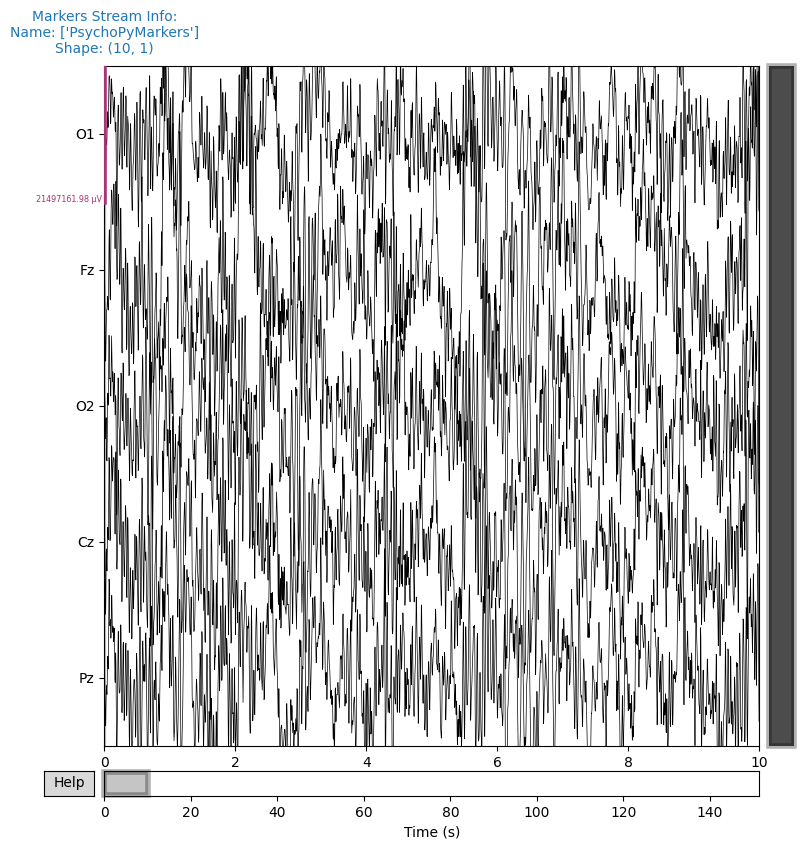

NOTE: plot_psd() is a legacy function. New code should use .compute_psd().plot().
Effective window size : 8.000 (s)
Plotting power spectral density (dB=True).
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
Overwriting existing file.
Writing /content/preprocessed_data_selected_channels.fif
Closing /content/preprocessed_data_selected_channels.fif
[done]


<ipython-input-7-6f4986510160>:21: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  raw.plot_psd(fmin=0.1, fmax=50, show=True)
<ipython-input-7-6f4986510160>:28: RuntimeWarning: This filename (/content/preprocessed_data_selected_channels.fif) does not conform to MNE naming conventions. All raw files should end with raw.fif, raw_sss.fif, raw_tsss.fif, _meg.fif, _eeg.fif, _ieeg.fif, raw.fif.gz, raw_sss.fif.gz, raw_tsss.fif.gz, _meg.fif.gz, _eeg.fif.gz or _ieeg.fif.gz
  raw.save(preprocessed_file, overwrite=True)


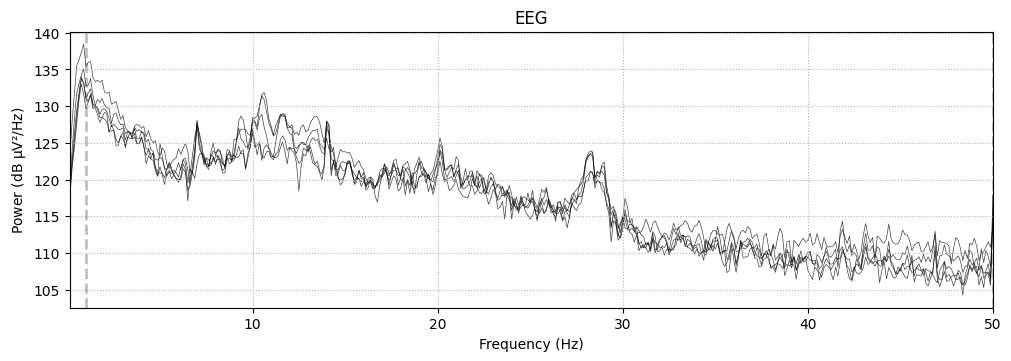

In [7]:
import mne

# Load the .fif file
file_path = '/content/TestEEG.fif'  # Replace with your actual .fif file path
raw = mne.io.read_raw_fif(file_path, preload=True)

# Print information about the data
print(raw.info)

# Select the channels of interest
channels_of_interest = ['O1', 'Fz', 'O2', 'Cz', 'Pz']
raw.pick_channels(channels_of_interest)

# Filter the data (example: 1-50 Hz bandpass filter)
raw.filter(1., 50., fir_design='firwin')

# Plot the raw data for the selected channels
raw.plot(n_channels=len(channels_of_interest), scalings='auto', title='Selected EEG Channels', show=True, block=True)

# Plot the power spectral density (PSD) to visualize frequency components for these channels
raw.plot_psd(fmin=0.1, fmax=50, show=True)

# You can also re-reference the data (optional)
raw.set_eeg_reference('average', projection=True)

# Save the preprocessed data with selected channels if needed
preprocessed_file = 'preprocessed_data_selected_channels.fif'
raw.save(preprocessed_file, overwrite=True)
